## Tourist Places In North india

### The dataset represents tourist destinations in North India and includes various features such as location, popularity, accessibility, amenities, and an overall attractiveness score. Each row corresponds to a specific tourist spot, providing both qualitative and quantitative insights. The Location column, initially categorical, is one-hot encoded for analysis. The target variable, Attractiveness_Score, is a numerical value that indicates the perceived appeal of the destination. This dataset is ideal for regression analysis to predict scores and understand the factors contributing to a location's attractiveness.









#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore",category=UserWarning)


#### Load The Dataset

In [2]:
data=pd.read_csv(r"C:\Users\Adithya\Downloads\north_india_tourist_data.csv")
df=pd.DataFrame(data)
print(df.to_string())

      Location    Rating   Popularity  Amenities  Distance_from_City  Attractiveness_Score
0     Amritsar  3.488347  8696.572237         43           94.953030            440.150781
1       Shimla  4.449455  2559.028101          5          372.825362            131.547739
2       Manali  4.798082  1409.288277         21          424.724302             86.087213
3     Amritsar  1.588294   724.566567         45          275.064665             48.284652
4       Jaipur  4.706351  6598.729254         34          490.945135            351.117299
5       Manali  2.968465  6267.393343         17          227.986893            302.934496
6       Manali  2.032978  5693.625421         25          259.117264            270.135172
7     Amritsar  2.836543  2703.497413         23          494.662788            139.041604
8         Agra  4.920130  4213.606961         23          119.616476            225.333175
9       Jaipur  2.970472  6147.525184         29          471.560240            277.705761

#### Checking Information

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Location              1000 non-null   object 
 1   Rating                1000 non-null   float64
 2   Popularity            1000 non-null   float64
 3   Amenities             1000 non-null   int64  
 4   Distance_from_City    1000 non-null   float64
 5   Attractiveness_Score  1000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB
None


#### Checking Null Values

In [4]:
data.isna()

,Location,Rating,Popularity,Amenities,Distance_from_City,Attractiveness_Score
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


#### Cleaning Empty Cells

In [5]:
new_df=df.dropna(inplace=True)
print(new_df)

None


#### Correlation

In [6]:
print(df[['Location','Distance_from_City']])

      Location  Distance_from_City
0     Amritsar           94.953030
1       Shimla          372.825362
2       Manali          424.724302
3     Amritsar          275.064665
4       Jaipur          490.945135
..         ...                 ...
995  Rishikesh           62.656536
996      Delhi          130.859310
997   Amritsar          151.256623
998     Shimla          267.335319
999  Rishikesh          340.803983

[1000 rows x 2 columns]


#### Split the dataset into features and target

In [7]:
X = data.drop(columns=['Attractiveness_Score'], axis=1)
y = data['Attractiveness_Score']


#### One-hot encode the 'Location' column

In [8]:

encoder = OneHotEncoder(sparse_output=False, drop='first')  
location_encoded = encoder.fit_transform(data[['Location']])
location_columns = encoder.get_feature_names_out(['Location'])


#### Add encoded columns to the dataset

In [9]:
encoded_df = pd.DataFrame(location_encoded, columns=location_columns)
data = pd.concat([data, encoded_df], axis=1)
data.drop(columns=['Location'], inplace=True)


#### Split the dataset into features and target

In [10]:
X = data.drop(columns=['Attractiveness_Score'])
y = data['Attractiveness_Score']


#### Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####  Create and train the linear regression model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### Make Prediction

In [13]:
y_pred = model.predict(X_test)

#### Calculate the R^2 score

In [14]:
r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

R^2 Score: 0.9948037375305708


#### Scatter plot of true vs predicted values

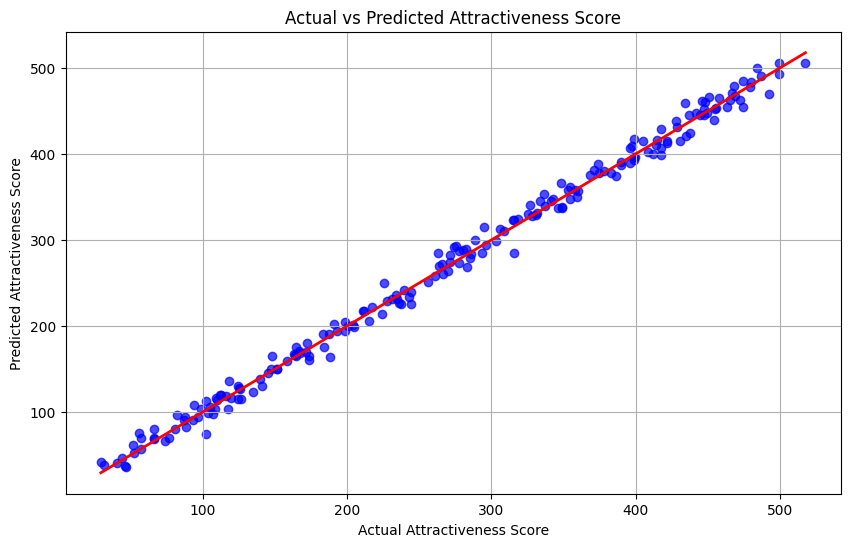

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Attractiveness Score")
plt.ylabel("Predicted Attractiveness Score")
plt.title("Actual vs Predicted Attractiveness Score")
plt.grid(True)
plt.show()